In [2]:
import pandas as pd


# Load CSV files
pokemon_df = pd.read_csv('pokemon.csv')
combats_df = pd.read_csv('combats.csv')

# Show data preview

print(pokemon_df.head())
print(combats_df.head())



   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  
   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


In [3]:
# Rename column '#' to 'id' to make merging easier
pokemon_df.rename(columns={'#': 'id'}, inplace=True)

# Merge to add the first Pokémon's information

merged_df = combats_df.merge(pokemon_df, left_on='First_pokemon', right_on='id', suffixes=('_first', '_second'))
print(merged_df.head())


   First_pokemon  Second_pokemon  Winner   id      Name Type 1    Type 2  HP  \
0            266             298     298  266  Larvitar   Rock    Ground  50   
1            702             701     701  702  Virizion  Grass  Fighting  91   
2            191             668     668  191   Togetic  Fairy    Flying  55   
3            237             683     683  237    Slugma   Fire       NaN  40   
4            151             231     151  151   Omastar   Rock     Water  70   

   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0      64       50       45       50     41           2      False  
1      90       72       90      129    108           5       True  
2      40       85       80      105     40           2      False  
3      40       40       70       40     20           2      False  
4      60      125      115       70     55           1      False  


In [4]:
missing_values = merged_df.isnull().sum()
print(missing_values)

First_pokemon         0
Second_pokemon        0
Winner                0
id                    0
Name                 56
Type 1                0
Type 2            24031
HP                    0
Attack                0
Defense               0
Sp. Atk               0
Sp. Def               0
Speed                 0
Generation            0
Legendary             0
dtype: int64


In [5]:
# Fill missing name for Pokémon #62
merged_df.loc[merged_df['id'] == 62, 'Name'] = 'Primeape'

# Replace NaN in 'Type 2' with 'None'
merged_df['Type 2'] = merged_df['Type 2'].fillna('None')

# Check the changes
print(merged_df.loc[merged_df['id'] == 62])

       First_pokemon  Second_pokemon  Winner  id      Name    Type 1 Type 2  \
1062              62             576     576  62  Primeape  Fighting   None   
1515              62             154     154  62  Primeape  Fighting   None   
1686              62             470      62  62  Primeape  Fighting   None   
1999              62             755      62  62  Primeape  Fighting   None   
2680              62             127     127  62  Primeape  Fighting   None   
...              ...             ...     ...  ..       ...       ...    ...   
46481             62             682     682  62  Primeape  Fighting   None   
46872             62             475     475  62  Primeape  Fighting   None   
48677             62              68      68  62  Primeape  Fighting   None   
48884             62             539     539  62  Primeape  Fighting   None   
49980             62              25      25  62  Primeape  Fighting   None   

       HP  Attack  Defense  Sp. Atk  Sp. Def  Speed

In [6]:

# Count total battles per Pokémon using pd.concat
total_battles = pd.concat([merged_df['First_pokemon'], merged_df['Second_pokemon']]).value_counts()

# Count total wins per Pokémon
total_wins = merged_df['Winner'].value_counts()

# Create a DataFrame to store the results
win_percentage_df = pd.DataFrame({
    'Total Battles': total_battles,
    'Total Wins': total_wins
})

# Replace NaN values with 0 for Pokémon who didn't win any battle
win_percentage_df['Total Wins'] = win_percentage_df['Total Wins'].fillna(0)

# Calculate Win Percentage
win_percentage_df['Win Percentage'] = (win_percentage_df['Total Wins'] / win_percentage_df['Total Battles']) * 100

# Reset index and rename it to 'Pokemon ID' for clarity
win_percentage_df = win_percentage_df.reset_index().rename(columns={'index': 'Pokemon ID'})

# Display the result
print(win_percentage_df)

     Pokemon ID  Total Battles  Total Wins  Win Percentage
0             1            133        37.0       27.819549
1             2            121        46.0       38.016529
2             3            132        89.0       67.424242
3             4            125        70.0       56.000000
4             5            112        55.0       49.107143
..          ...            ...         ...             ...
779         796            105        39.0       37.142857
780         797            131       116.0       88.549618
781         798            119        60.0       50.420168
782         799            144        89.0       61.805556
783         800            121        75.0       61.983471

[784 rows x 4 columns]


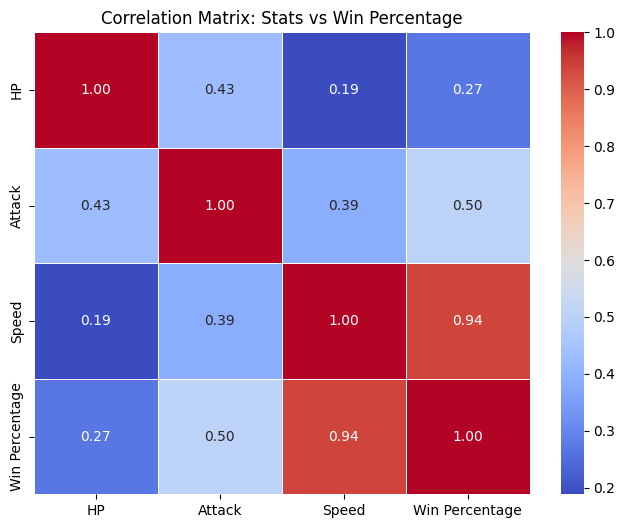

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Merge data using 'id' and 'Pokemon ID'

merged_stats_df = pd.merge(merged_df, win_percentage_df, left_on='id', right_on='Pokemon ID')

# Select the relevant columns for analysis
stats_df = merged_stats_df[['HP', 'Attack', 'Speed', 'Win Percentage']]

# Calculate the correlation matrix

correlation_matrix = stats_df.corr()

# Display the correlation matrix with seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Stats vs Win Percentage')
plt.show()

From this correlation table, we can observe that the variables most correlated with the win percentage variable are 'Attack' and 'Speed'.

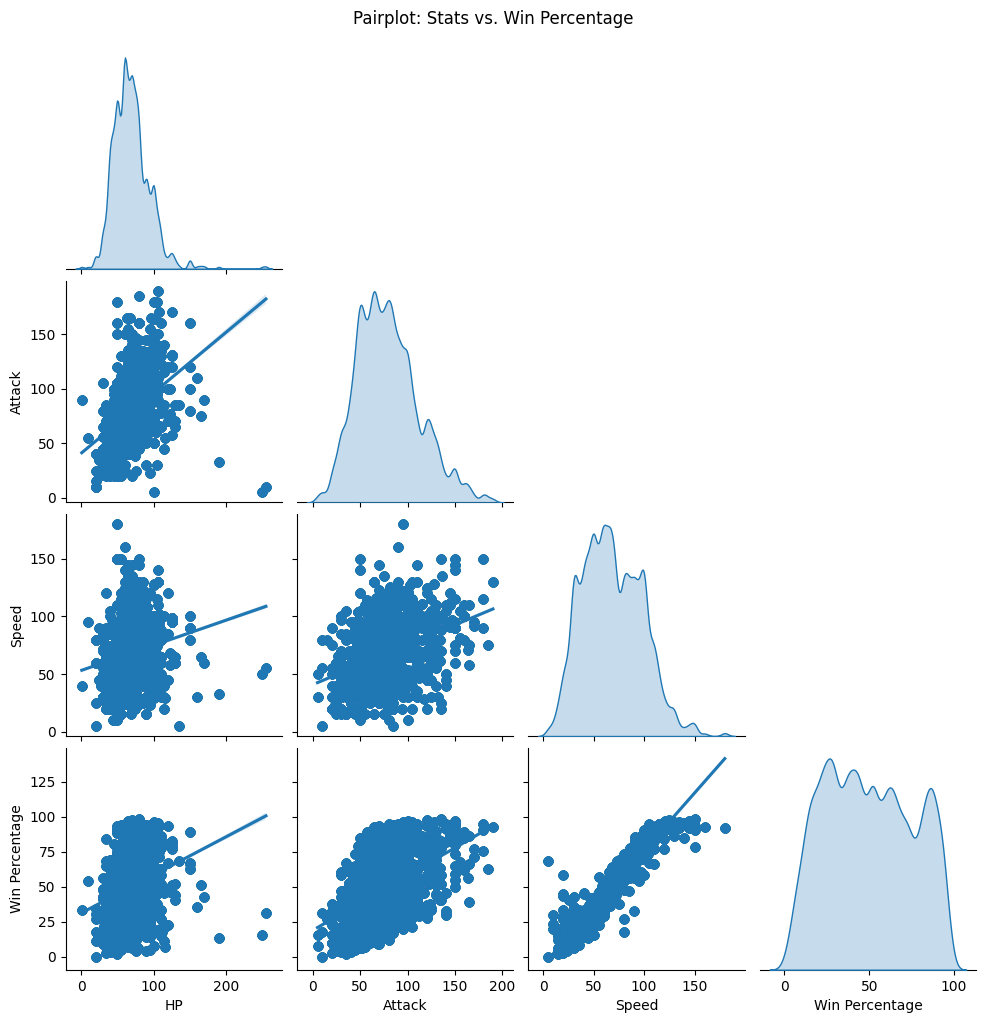

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
stats_df = merged_stats_df[['HP', 'Attack', 'Speed', 'Win Percentage']]

# Create a pairplot
sns.pairplot(stats_df, kind='reg', diag_kind='kde', corner=True)

# Show Charts
plt.suptitle('Pairplot: Stats vs. Win Percentage', y=1.02)
plt.show()

These different graphs confirm the significant correlations between the variables 'Attack', 'Speed' with the variable 'Win Percentage'

In [9]:
# 1. Select the top 10 Pokémon by win percentage

top_10_pokemon = win_percentage_df.sort_values(by='Win Percentage', ascending=False).head(10)

# 2. Merge with statistics
top_10_stats = pd.merge(top_10_pokemon, merged_df, left_on='Pokemon ID', right_on='id')

# 3. Select relevant columns
top_10_stats = top_10_stats[['Pokemon ID', 'Name', 'Win Percentage', 'HP', 'Attack', 'Speed']]

# Display data in table format
print(top_10_stats)


     Pokemon ID             Name  Win Percentage  HP  Attack  Speed
0           155  Mega Aerodactyl       98.449612  80     135    150
1           155  Mega Aerodactyl       98.449612  80     135    150
2           155  Mega Aerodactyl       98.449612  80     135    150
3           155  Mega Aerodactyl       98.449612  80     135    150
4           155  Mega Aerodactyl       98.449612  80     135    150
..          ...              ...             ...  ..     ...    ...
620         350    Mega Sharpedo       95.000000  70     140    105
621         350    Mega Sharpedo       95.000000  70     140    105
622         350    Mega Sharpedo       95.000000  70     140    105
623         350    Mega Sharpedo       95.000000  70     140    105
624         350    Mega Sharpedo       95.000000  70     140    105

[625 rows x 6 columns]


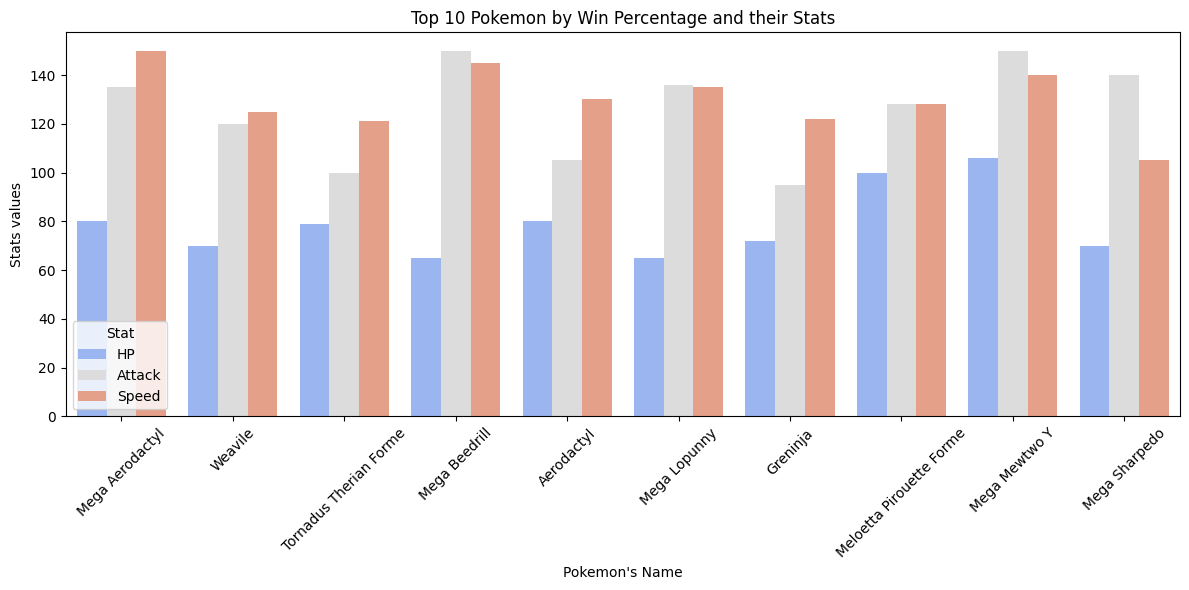

In [10]:
# 4. Statistics Visualization
stats = ['HP', 'Attack', 'Speed']
top_10_stats_melted = top_10_stats.melt(id_vars=['Name'], value_vars=stats, var_name='Stat', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_stats_melted, x='Name', y='Value', hue='Stat', palette='coolwarm')

plt.title('Top 10 Pokemon by Win Percentage and their Stats')
plt.xlabel("Pokemon's Name")
plt.ylabel('Stats values')
plt.xticks(rotation=45)
plt.legend(title='Stat')
plt.tight_layout()
plt.show()

In this representation of the top 10 Pokemon based on certain characteristics such as Attack, Speed ​​and HP, it appears that these 10 big winners have in common having a very high attack power and a very high speed level too. The HP variable on the other hand is a little more negligible compared to these 2 other characteristics.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data preparation
features = ['HP', 'Attack', 'Speed']
X = merged_stats_df[features]
y = merged_stats_df['Win Percentage']

# 2. Splitting data into training and testing sets (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Models Initialization
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# Results storage
results = []

               Model       MAE      RMSE        R²
0  Linear Regression  5.755849  7.858282  0.903864
1      Random Forest  0.271770  1.043353  0.998305
2            XGBoost  0.624628  1.197586  0.997767


<ipython-input-12-f79c72206626>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_df, palette='coolwarm')


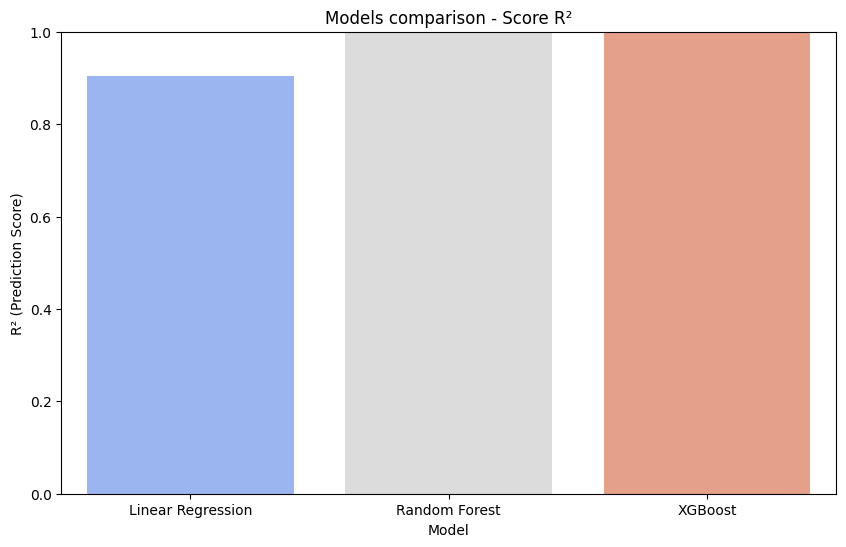

In [12]:
# Training and evaluation of each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })

# Converting results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# 4. Performance Visualization

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results_df, palette='coolwarm')
plt.title('Models comparison - Score R²')
plt.ylabel('R² (Prediction Score)')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

If we refer to the Mean Absolute Error, the best performing model, therefore showing the least error, is the Random Forest model.

Overall, the Random Forest and XGBoost models are very similar in terms of performance with an almost identical and very low level of error. The model involving linear regression, on the other hand, is not an effective model in terms of qualitative prediction with an R2 and an MAE much higher than the other two models.